> ##  Sentiment Analysis on Amazon Reviews

In [1]:
import numpy as np
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
from collections import Counter 
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelakrontiris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Define set of stopwords from nltk
stopwords_set = set(stopwords.words('english'))

In [3]:
from string import punctuation

# Function to remove punctuation from string 
def remove_punctuation(string):
    return "".join(c for c in string if c not in punctuation)

In [4]:
porter=PorterStemmer()

# Function to perform tokenization and stemming of each sentence
def stemSentence(sentence):
    
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
        
    return "".join(stem_sentence)

> ### Task 1: Preprocessing, WordCloud, and Interpretation

In [5]:
# URL that will be used to scrape from 
url = "https://storm.cis.fordham.edu/~yli/data/electronics/"

# Fetch the content from the url, using the requests library
page_response = requests.get(url)  # response #200 means url went through

# Use the html parser to parse the url content and store in variable
page_content = BeautifulSoup(page_response.text, "html.parser")

In [6]:
# Extracting all the <a> tags into a list
tags = page_content.find_all('a')[5:]

# Extracting URLs from the attribute href in the <a> tags
file_names = [tag.get('href') for tag in tags]

In [7]:
# Get URLs 
url_list = [ "https://storm.cis.fordham.edu/~yli/data/electronics/" + file_name for file_name in file_names]

In [8]:
pos_reviews_url = url_list[1]
neg_reviews_url = url_list[0]

> ### Positive reviews DataFrame

In [9]:
# Read in positive reviews from url and search for content stored in <review_text> tags.
response = requests.get(pos_reviews_url)
soup = BeautifulSoup(response.text, "html.parser")
pos_content = soup.find_all("review_text") # Displays text within review_text tags

# Loop through list of positive reviews and store in list
pos_reviews_list = []

for i in range(len(pos_content)):
    for p_review in pos_content[i]:
#         stem_p_review = stemSentence(p_review) #tokenize and stem reviews    
        p_review_RP = remove_punctuation(p_review) # remove punctuations
        pos_reviews_list.append(p_review_RP.lower())
        
# Replace \n with ""
pos_reviews_cleaned = [pos_review.replace("\n", "").replace("�","") for pos_review in pos_reviews_list]
        
# Number of positive reviews
print("There are {} positive reviews.\n\n".format(len(pos_reviews_list)))
        
# Convert positive reviews list to DataFrame
pos_df = pd.DataFrame({"reviews": pos_reviews_cleaned, "score": 1})
pos_df.head()

There are 1000 positive reviews.




,reviews,score
0,i purchased this unit due to frequent blackout...,1
1,i ordered 3 apc backups es 500s on the recomme...,1
2,wish the unit had a separate onlineoffline lig...,1
3,cheaper than thick cd cases and less prone to ...,1
4,hii brought 256 mb kingston sd card from amazo...,1


> ### Negative reviews DataFrame

In [10]:
# Read in  negative reviews from url and search for content stored in <review_text> tags.
response = requests.get(neg_reviews_url)
soup = BeautifulSoup(response.text, "html.parser")
neg_content = soup.find_all("review_text") # Displays text within review_text tags
neg_reviews = [p for p in str(neg_content)]

# Loop through list of negative reviews and store in list
neg_reviews_list = []
for i in range(len(neg_content)):
    for n_review in neg_content[i]:
#         stem_n_review = stemSentence(n_review) #tokenize and stem reviews
        n_review_RP = remove_punctuation(n_review) # remove punctuations
        neg_reviews_list.append(n_review_RP.lower())
        
# Replace \n with ""
neg_reviews_cleaned = [neg_review.replace("\n", "").replace("�","") for neg_review in neg_reviews_list]

# Number of negative reviews
print("There are {} negative reviews.\n\n".format(len(neg_reviews_list)))
        
# Convert negative reviews list to DataFrame
neg_df = pd.DataFrame({"reviews": neg_reviews_cleaned, "score": 0})
neg_df.head()

There are 1000 negative reviews.




,reviews,score
0,constips extremely easy on carpet and if you h...,0
1,its a nice look but it tips over very easily i...,0
2,i have bought and returned three of these unit...,0
3,i knew these were inexpensive cd cases but i c...,0
4,i used a 25 pack of these doing dvd backups an...,0


> ### Compare a review with and without stemming:


In [11]:
pos_reviews_cleaned[8]

'i had no problems with this card and the delivery was promptthank you muc'

In [12]:
stemSentence(pos_reviews_cleaned[8])

'i had no problem with thi card and the deliveri wa promptthank you muc '

> ### DataFrame combining postive and negative reviews 

In [13]:
df = pd.concat([pos_df,neg_df], ignore_index=True)
df.head()

,reviews,score
0,i purchased this unit due to frequent blackout...,1
1,i ordered 3 apc backups es 500s on the recomme...,1
2,wish the unit had a separate onlineoffline lig...,1
3,cheaper than thick cd cases and less prone to ...,1
4,hii brought 256 mb kingston sd card from amazo...,1


In [14]:
# Shuffle dataset
df = df.sample(frac=1)
df.head()

,reviews,score
98,this was the least expensive 1 gb memory card ...,1
1507,please for the love of god do not buy this pro...,0
1836,i like the phones simplicity and ergonomics it...,0
1735,my this earbud headphone is poor in bass resp...,0
1742,the bel rx65 worked great for about 1 month a...,0


In [15]:
# What is the longest review?
review_length = df["reviews"].str.len()
max(review_length)

5602

> ### Build new features with text

In [16]:
# Tokens from a column
word_tokens = [word_tokenize(review) for review in df["reviews"]]

# Create a new column with length of each review
len_tokens = []

# Iterate over the word_tokens list
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

# Add n_tokens to DataFrame
df["n_tokens"] = len_tokens

In [17]:
df.head()

,reviews,score,n_tokens
98,this was the least expensive 1 gb memory card ...,1,21
1507,please for the love of god do not buy this pro...,0,148
1836,i like the phones simplicity and ergonomics it...,0,41
1735,my this earbud headphone is poor in bass resp...,0,100
1742,the bel rx65 worked great for about 1 month a...,0,141


> ### WordCloud
Cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. 

In [18]:
# Let's start with one review in the positive class
text = pos_df["reviews"][5]
text

'this product was perfect its a sturdy case that holds my large collection of cds and dvdsmy other cases were flimsy and wore out fast this one has a hard outside shell and the inside holds my dvds nicelyso i have no complaints and at the price i paid id say this was a great deal'

In [19]:
# Create and generate a word cloud image
wordcloud = WordCloud(width=1600, height=800).generate(text)

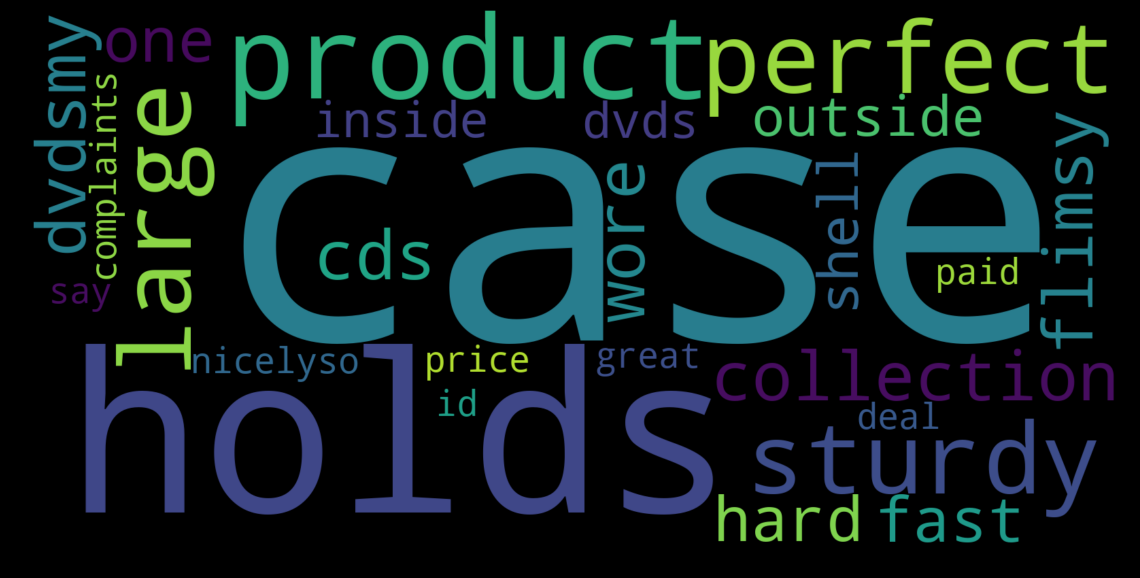

In [20]:
# Display the generated image
# interpolation="bilinear" will display image appear more smoothly
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# Function for calculating the frequency words in a string and returns top n words
def getMostCommonWords(reviews, n_most_common, stopwords=None):
    """Params:
        1. reviews: column from DataFrame (e.g. df['Reviews'])\
        2. n_most_common: top n most common words in reviews (int)\
        3. stopwords: list of stopwords (str) to remove form reviews (list)      
    """
    from collections import Counter
    
    # Flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in review.lower().split()]

    # Remove punctuation from reviews
    flattened_reviews = ["".join(char for char in review if char not in string.punctuation) for review in flattened_reviews]

    # Remove stopwords, if applicable
    if stopwords:
        flattened_reviews = [word for word in flattened_reviews if word not in stopwords]

    # Remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [22]:
def commonWordsJoined(most_occur):
    # Get the most common words from key, value pairs in Counter
    most_common_words = [word for word, word_count in most_occur]
    
    # Join words in one giant string
    most_common_words_join = " ".join(p for p in most_common_words)
    
    return most_common_words_join

> ### Top 20 most common words in the positive class without stopwords

Top 20 words from the positive class without stopwords:
 {'great': 402, 'good': 399, 'sound': 355, 'quality': 278, 'well': 243, 'price': 234, 'dont': 224, 'phone': 206, 'used': 202, 'time': 186, 'works': 185, 'ipod': 185, 'better': 179, 'even': 178, 'much': 177, 'really': 171, 'little': 169, 'speakers': 166, 'buy': 164, 'easy': 158}

Top 20 Positive Class (NS) WordCloud:


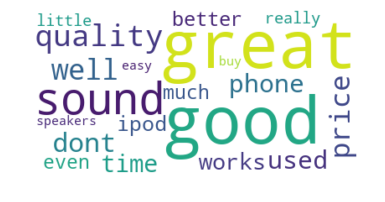

In [23]:
# Define stopwords and update list
my_stopwords = set(STOPWORDS)

# Remove words that are frequent in both negative and positive reviews or are not relevant
my_stopwords.update(['product','bought','ive','also','one', 'will', 'use', 'im', 'now', 'got']) 

# Top 20 words - positive class without stopwords
P_NS_20 = getMostCommonWords(pos_df["reviews"], 20, stopwords=my_stopwords)
print("Top 20 words from the positive class without stopwords:\n", dict(P_NS_20))

# Generate wordCloud
print("\nTop 20 Positive Class (NS) WordCloud:")
P_NS_20_WordCloud =  WordCloud(background_color='white').generate_from_frequencies(dict(P_NS_20))
plt.imshow(P_NS_20_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 20 most common words in the positive class with stopwords

Top 20 words from the positive class with stopwords:
 {'the': 5888, 'i': 3052, 'and': 2894, 'to': 2769, 'a': 2657, 'it': 2063, 'is': 1856, 'of': 1567, 'for': 1450, 'this': 1336, 'in': 1146, 'with': 1141, 'that': 1126, 'my': 1125, 'you': 1068, 'on': 946, 'have': 897, 'but': 683, 'are': 663, 'as': 640}

Top 20 Positive Class (S) WordCloud:


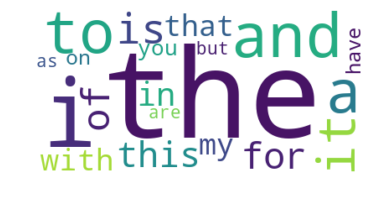

In [24]:
# Top 20 words - positive class with stopwords
P_S_20 = getMostCommonWords(pos_df["reviews"], 20,  stopwords=None)
print("Top 20 words from the positive class with stopwords:\n", dict(P_S_20))

# Generate wordCloud
print("\nTop 20 Positive Class (S) WordCloud:")
P_S_20_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(P_S_20))
plt.imshow(P_S_20_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 20 most common words in the negative class without stopwords

Top 20 words from the negative class without stopwords:
 {'work': 333, 'dont': 279, 'back': 260, 'time': 249, 'even': 242, 'good': 236, 'unit': 235, 'buy': 223, 'first': 209, 'card': 201, 'sound': 188, 'problem': 188, 'phone': 177, 'quality': 174, 'ipod': 173, 'new': 163, 'two': 162, 'support': 162, 'another': 157, 'worked': 157}

Top 20 Negative Class (NS) WordCloud:


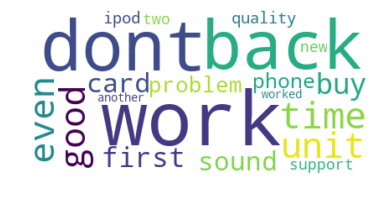

In [25]:
# Top 20 words - negative class without stopwords
N_NS_20 = getMostCommonWords(neg_df["reviews"], 20, stopwords=my_stopwords)
print("Top 20 words from the negative class without stopwords:\n", dict(N_NS_20))

# Generate wordCloud
print("\nTop 20 Negative Class (NS) WordCloud:")
N_NS_20_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(N_NS_20))
plt.imshow(N_NS_20_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 20 most common words in the negative class with stopwords

Top 20 words from the negative class with stopwords:
 {'the': 5913, 'i': 3463, 'to': 3067, 'and': 2778, 'a': 2512, 'it': 2505, 'is': 1573, 'of': 1547, 'this': 1479, 'that': 1210, 'for': 1192, 'in': 1081, 'my': 1074, 'not': 991, 'with': 985, 'on': 922, 'was': 880, 'you': 879, 'have': 870, 'but': 810}

Top 20 Negative Class (S) WordCloud:


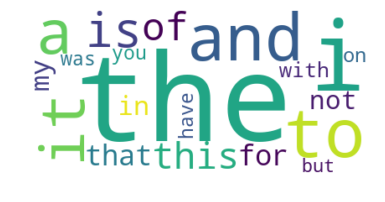

In [26]:
# Top 20 words - negative class with stopwords
N_S_20 = getMostCommonWords(neg_df["reviews"], 20, stopwords=None)
print("Top 20 words from the negative class with stopwords:\n", dict(N_S_20))

# Generate wordCloud
print("\nTop 20 Negative Class (S) WordCloud:")
N_S_20_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(N_S_20))
plt.imshow(N_S_20_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 50 most common words in the positive class without stopwords

Top 50 words from the positive class without stopwords:
 {'great': 402, 'good': 399, 'sound': 355, 'quality': 278, 'well': 243, 'price': 234, 'dont': 224, 'phone': 206, 'used': 202, 'time': 186, 'works': 185, 'ipod': 185, 'better': 179, 'even': 178, 'much': 177, 'really': 171, 'little': 169, 'speakers': 166, 'buy': 164, 'easy': 158, 'need': 157, 'using': 157, 'work': 153, 'cable': 147, 'player': 143, 'first': 142, 'mouse': 142, 'unit': 140, 'new': 138, 'case': 136, 'best': 134, 'headphones': 127, 'still': 121, 'small': 119, 'music': 117, 'card': 116, 'recommend': 115, 'want': 113, 'go': 111, 'many': 111, 'bass': 109, 'screen': 108, 'without': 107, 'system': 107, 'problem': 105, 'bit': 105, 'two': 104, 'back': 104, 'way': 103, '2': 102}

Top 50 Positive Class (NS) WordCloud:


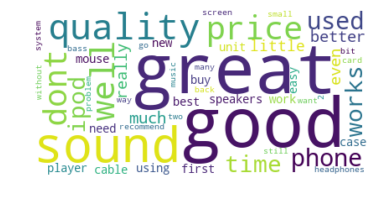

In [27]:
# Top 50 words - positive class without stopwords
P_NS_50 = getMostCommonWords(pos_df["reviews"], 50, stopwords=my_stopwords)
print("Top 50 words from the positive class without stopwords:\n", dict(P_NS_50))

# Generate wordCloud
print("\nTop 50 Positive Class (NS) WordCloud:")
P_NS_50_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(P_NS_50))
plt.imshow(P_NS_50_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 50 most common words in the positive class with stopwords

Top 50 words from the positive class with stopwords:
 {'the': 5888, 'i': 3052, 'and': 2894, 'to': 2769, 'a': 2657, 'it': 2063, 'is': 1856, 'of': 1567, 'for': 1450, 'this': 1336, 'in': 1146, 'with': 1141, 'that': 1126, 'my': 1125, 'you': 1068, 'on': 946, 'have': 897, 'but': 683, 'are': 663, 'as': 640, 'not': 632, 'was': 594, 'so': 498, 'one': 448, 'be': 446, 'use': 438, 'very': 437, 'or': 435, 'if': 426, 'great': 402, 'at': 401, 'good': 399, 'all': 391, 'had': 379, 'your': 377, 'from': 371, 'its': 371, 'they': 368, 'can': 363, 'these': 357, 'sound': 355, 'when': 342, 'up': 325, 'just': 312, 'has': 301, 'an': 286, 'no': 285, 'like': 284, 'quality': 278, 'about': 272}

Top 50 Positive Class (S) WordCloud:


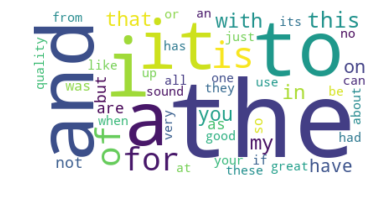

In [28]:
# Top 50 words - positive class with stopwords
P_S_50 = getMostCommonWords(pos_df["reviews"], 50, stopwords=None)
print("Top 50 words from the positive class with stopwords:\n", dict(P_S_50))

# Generate wordCloud
print("\nTop 50 Positive Class (S) WordCloud:")
P_S_50_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(P_S_50))
plt.imshow(P_S_50_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 50 most common words in the negative class without stopwords

Top 50 words from the negative class without stopwords:
 {'work': 333, 'dont': 279, 'back': 260, 'time': 249, 'even': 242, 'good': 236, 'unit': 235, 'buy': 223, 'first': 209, 'card': 201, 'sound': 188, 'problem': 188, 'phone': 177, 'quality': 174, 'ipod': 173, 'new': 163, 'two': 162, 'support': 162, 'another': 157, 'worked': 157, 'great': 153, 'well': 152, 'better': 150, 'much': 148, 'doesnt': 143, 'software': 143, 'money': 138, 'months': 137, '2': 135, 'really': 133, 'tried': 129, 'thing': 129, 'computer': 128, 'used': 122, 'way': 122, 'using': 119, 'purchased': 119, 'still': 119, 'bad': 117, 'cant': 114, 'cable': 114, 'works': 111, 'find': 111, 'never': 109, 'didnt': 108, 'amazon': 108, 'service': 106, 'go': 105, 'device': 103, 'router': 101}

Top 50 Negative Class (S) WordCloud:


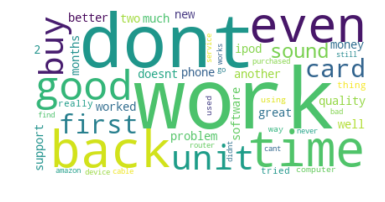

In [29]:
# Top 50 words - negative class without stopwords
N_NS_50 = getMostCommonWords(neg_df["reviews"], 50, stopwords=my_stopwords)
print("Top 50 words from the negative class without stopwords:\n", dict(N_NS_50))

# Generate wordCloud
print("\nTop 50 Negative Class (S) WordCloud:")
N_NS_50_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(N_NS_50))
plt.imshow(N_NS_50_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 50 most common words in the negative class with stopwords

Top 50 words from the negative class with stopwords:
 {'the': 5913, 'i': 3463, 'to': 3067, 'and': 2778, 'a': 2512, 'it': 2505, 'is': 1573, 'of': 1547, 'this': 1479, 'that': 1210, 'for': 1192, 'in': 1081, 'my': 1074, 'not': 991, 'with': 985, 'on': 922, 'was': 880, 'you': 879, 'have': 870, 'but': 810, 'they': 547, 'be': 501, 'one': 473, 'so': 463, 'at': 438, 'as': 438, 'if': 437, 'are': 436, 'from': 433, 'or': 426, 'all': 423, 'me': 409, 'had': 408, 'when': 399, 'get': 378, 'would': 374, 'just': 365, 'no': 360, 'out': 355, 'after': 355, 'work': 333, 'very': 330, 'will': 325, 'its': 321, 'these': 318, 'about': 312, 'your': 308, 'an': 307, 'up': 303, 'them': 286}

Top 50 Negative Class (S) WordCloud:


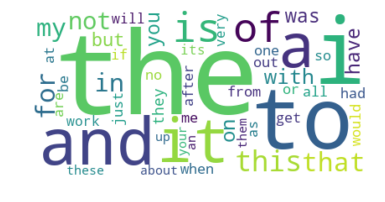

In [30]:
# Top 50 words - negative class with stopwords
N_S_50 = getMostCommonWords(neg_df["reviews"], 50, stopwords=None)
print("Top 50 words from the negative class with stopwords:\n", dict(N_S_50))

# Generate wordCloud
print("\nTop 50 Negative Class (S) WordCloud:")
N_S_50_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(N_S_50))
plt.imshow(N_S_50_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 100 most common words in the positive class without stopwords

Top 100 words from the positive class without stopwords:
 {'great': 402, 'good': 399, 'sound': 355, 'quality': 278, 'well': 243, 'price': 234, 'dont': 224, 'phone': 206, 'used': 202, 'time': 186, 'works': 185, 'ipod': 185, 'better': 179, 'even': 178, 'much': 177, 'really': 171, 'little': 169, 'speakers': 166, 'buy': 164, 'easy': 158, 'need': 157, 'using': 157, 'work': 153, 'cable': 147, 'player': 143, 'first': 142, 'mouse': 142, 'unit': 140, 'new': 138, 'case': 136, 'best': 134, 'headphones': 127, 'still': 121, 'small': 119, 'music': 117, 'card': 116, 'recommend': 115, 'want': 113, 'go': 111, 'many': 111, 'bass': 109, 'screen': 108, 'without': 107, 'system': 107, 'problem': 105, 'bit': 105, 'two': 104, 'back': 104, 'way': 103, '2': 102, 'right': 102, 'nice': 101, 'far': 99, 'set': 99, 'cant': 99, 'problems': 97, 'find': 97, 'usb': 97, 'amazon': 95, 'excellent': 93, 'never': 92, 'make': 91, 'found': 91, 'tv': 90, 'lot': 89, 'purchased': 88, 'know': 88, 'doesnt': 88, 'computer': 88, 'hom

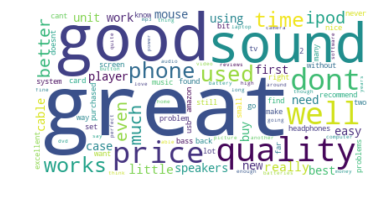

In [31]:
# Top 100 words - positive class without stopwords
P_NS_100 = getMostCommonWords(pos_df["reviews"], 100, stopwords=my_stopwords)
print("Top 100 words from the positive class without stopwords:\n", dict(P_NS_100))

# Generate wordCloud
print("\nTop 100 Positive Class (NS) WordCloud:")
P_NS_100_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(P_NS_100))
plt.imshow(P_NS_100_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 100 most common words in the positive class with stopwords

Top 100 words from the positive class with stopwords:
 {'the': 5888, 'i': 3052, 'and': 2894, 'to': 2769, 'a': 2657, 'it': 2063, 'is': 1856, 'of': 1567, 'for': 1450, 'this': 1336, 'in': 1146, 'with': 1141, 'that': 1126, 'my': 1125, 'you': 1068, 'on': 946, 'have': 897, 'but': 683, 'are': 663, 'as': 640, 'not': 632, 'was': 594, 'so': 498, 'one': 448, 'be': 446, 'use': 438, 'very': 437, 'or': 435, 'if': 426, 'great': 402, 'at': 401, 'good': 399, 'all': 391, 'had': 379, 'your': 377, 'from': 371, 'its': 371, 'they': 368, 'can': 363, 'these': 357, 'sound': 355, 'when': 342, 'up': 325, 'just': 312, 'has': 301, 'an': 286, 'no': 285, 'like': 284, 'quality': 278, 'about': 272, 'than': 267, 'only': 267, 'them': 266, 'out': 265, 'will': 262, 'would': 258, 'more': 256, 'get': 256, 'which': 245, 'other': 244, 'well': 243, 'also': 240, 'me': 238, 'price': 234, 'product': 227, 'dont': 224, 'do': 221, 'some': 214, 'there': 208, 'bought': 206, 'phone': 206, 'used': 202, 'ive': 193, 'time': 186, 'am': 186

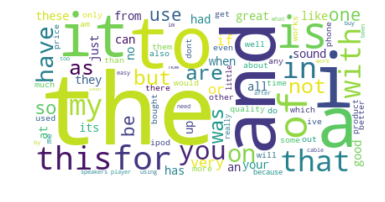

In [32]:
# Top 100 words - positive class with stopwords
P_S_100 = getMostCommonWords(pos_df["reviews"], 100, stopwords=None)
print("Top 100 words from the positive class with stopwords:\n", dict(P_S_100))

# Generate wordCloud
print("\nTop 100 Positive Class (S) WordCloud:")
P_S_100_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(P_S_100))
plt.imshow(P_S_100_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 100 most common words in the negative class without stopwords

Top 100 words from the negative class without stopwords:
 {'work': 333, 'dont': 279, 'back': 260, 'time': 249, 'even': 242, 'good': 236, 'unit': 235, 'buy': 223, 'first': 209, 'card': 201, 'sound': 188, 'problem': 188, 'phone': 177, 'quality': 174, 'ipod': 173, 'new': 163, 'two': 162, 'support': 162, 'another': 157, 'worked': 157, 'great': 153, 'well': 152, 'better': 150, 'much': 148, 'doesnt': 143, 'software': 143, 'money': 138, 'months': 137, '2': 135, 'really': 133, 'tried': 129, 'thing': 129, 'computer': 128, 'used': 122, 'way': 122, 'using': 119, 'purchased': 119, 'still': 119, 'bad': 117, 'cant': 114, 'cable': 114, 'works': 111, 'find': 111, 'never': 109, 'didnt': 108, 'amazon': 108, 'service': 106, 'go': 105, 'device': 103, 'router': 101, 'player': 99, 'return': 99, 'know': 99, 'set': 99, 'battery': 98, 'fine': 97, 'mouse': 97, '3': 95, 'need': 94, 'headphones': 94, 'times': 93, 'item': 92, 'something': 91, 'right': 91, 'working': 91, 'many': 90, 'every': 90, 'try': 90, 'differe

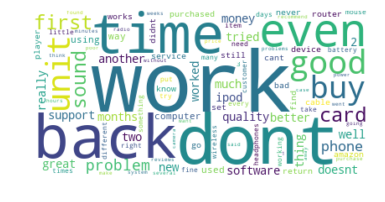

In [33]:
# Top 100 words - negative class without stopwords
N_NS_100 = getMostCommonWords(neg_df["reviews"], 100, stopwords=my_stopwords)
print("Top 100 words from the negative class without stopwords:\n", dict(N_NS_100))

# Generate wordCloud
print("\nTop 100 Negative Class (NS) WordCloud:")
N_NS_100_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(N_NS_100))
plt.imshow(N_NS_100_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Top 100 most common words in the negative class with stopwords

Top 100 words from the negative class with stopwords:
 {'the': 5913, 'i': 3463, 'to': 3067, 'and': 2778, 'a': 2512, 'it': 2505, 'is': 1573, 'of': 1547, 'this': 1479, 'that': 1210, 'for': 1192, 'in': 1081, 'my': 1074, 'not': 991, 'with': 985, 'on': 922, 'was': 880, 'you': 879, 'have': 870, 'but': 810, 'they': 547, 'be': 501, 'one': 473, 'so': 463, 'at': 438, 'as': 438, 'if': 437, 'are': 436, 'from': 433, 'or': 426, 'all': 423, 'me': 409, 'had': 408, 'when': 399, 'get': 378, 'would': 374, 'just': 365, 'no': 360, 'out': 355, 'after': 355, 'work': 333, 'very': 330, 'will': 325, 'its': 321, 'these': 318, 'about': 312, 'your': 308, 'an': 307, 'up': 303, 'them': 286, 'product': 282, 'dont': 279, 'has': 276, 'use': 273, 'only': 270, 'back': 260, 'bought': 256, 'time': 249, 'do': 247, 'even': 242, 'there': 237, 'good': 236, 'unit': 235, 'then': 232, 'can': 228, 'what': 225, 'other': 225, 'buy': 223, 'like': 220, 'more': 216, 'than': 213, 'which': 211, 'first': 209, 'any': 207, 'im': 207, 'now':

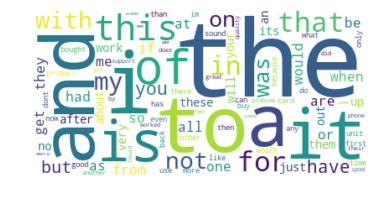

In [34]:
# Top 100 words - negative class with stopwords
N_S_100 = getMostCommonWords(neg_df["reviews"], 100, stopwords=None)
print("Top 100 words from the negative class with stopwords:\n", dict(N_S_100))

# Generate wordCloud
print("\nTop 100 Negative Class (S) WordCloud:")
N_S_100_WordCloud = WordCloud(background_color='white').generate_from_frequencies(dict(N_S_100))
plt.imshow(N_S_100_WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> ### Compare most common words in the Postive and Negative class without stopwords

In [35]:
pos20 = [word for word, word_count in P_NS_20]
neg20 = [word for word, word_count in N_NS_20]

In [36]:
words_intersect20 = Counter(pos20) & Counter(neg20)
print("Shared words between top 20 words in each class (with stopwords):\n", words_intersect20)

Shared words between top 20 words in each class (with stopwords):
 Counter({'good': 1, 'sound': 1, 'quality': 1, 'dont': 1, 'phone': 1, 'time': 1, 'ipod': 1, 'even': 1, 'buy': 1})


> ### Compare most common words in the Postive and Negative class with stopwords

In [37]:
pos_NS20 = [word for word, word_count in P_S_20]
neg_NS20 = [word for word, word_count in N_S_20]

In [38]:
words_NS_intersect20 = Counter(pos_NS20) & Counter(neg_NS20)
print("Shared words between top 20 words in each class (without stopwords):\n", words_NS_intersect20)

Shared words between top 20 words in each class (without stopwords):
 Counter({'the': 1, 'i': 1, 'and': 1, 'to': 1, 'a': 1, 'it': 1, 'is': 1, 'of': 1, 'for': 1, 'this': 1, 'in': 1, 'with': 1, 'that': 1, 'my': 1, 'you': 1, 'on': 1, 'have': 1, 'but': 1})


> 90% of the top 20 postive and negative reviews with stopwords have shared words. Will remove stop words in the sentiment analysis.
Initially, I removed the most common words between the two classes and test each model and noticed no improvement to both Naive Bayes and Logistic Regression.


> ### Apply PorterStemming on reviews

In [39]:
# Tokenize sentences
df["reviews"] = df["reviews"].apply(lambda x : filter(None, x.split(" ")))

# Apply stemmer
df["reviews"] = df["reviews"].apply(lambda review : [porter.stem(word) for word in review])

# Concatenate each word string into one string
df["reviews"] = df["reviews"].apply(lambda x : " ".join(x))


> ### Vectorization using CountVectorizer weighting

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# # Update stop words with common words in both classes
# my_stopwords.update(['great','good','quality'])

vectorizer = CountVectorizer(min_df=15, stop_words=my_stopwords)
X = vectorizer.fit_transform(df['reviews']) # bag of words, 136864 stored element
y = df["score"]

In [41]:
# Unique words (features)
unique_words = len(vectorizer.get_feature_names())
print("Number of unique words:", unique_words)

Number of unique words: 1076


Document-Term Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sum Document-term matrix
 [ 9 55 16 ... 20 16 26]


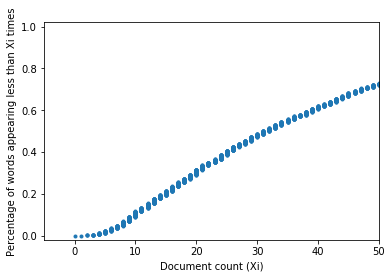

In [42]:
# Transformed vectorizer to a document-term matrix
X_dtm = X.toarray()
print('Document-Term Matrix\n', X_dtm)

# Take sum of each word (column) in the document-term matrix
sum_X_dtm = X_dtm.sum(axis=1)
print('Sum Document-term matrix\n', sum_X_dtm)

# Arrange sum feature array in order from least to greatest
X_axis = np.sort(sum_X_dtm)

#percentage of words that appear less than  xi times
y_axis = np.arange(1, len(X_axis)+1)/len(X_axis) 

# Plot ECDF (Empirical Cumulative Distribution Function)
plt.plot(X_axis, y_axis,  marker='.', linestyle='None')
plt.xlim((-5, 50))
plt.margins(0.02)
plt.xlabel('Document count (Xi)')
plt.ylabel('Percentage of words appearing less than Xi times')
plt.show()

In [43]:
# Exam vocabulary and document-term matrix
df_dtm = pd.DataFrame(X_dtm, columns=vectorizer.get_feature_names())
df_dtm.head()

,10,100,1000,12,14,15,18,20,200,2006,...,write,wrong,xp,ye,year,yet,youd,youll,youv,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> ### Task 2 & 3: Implement a NaiveBayes Classifier:

> 1. Split the data set into a training and test set.
> 2. Use `scikit-learn`'s `MultinomialNB()` classifier with default parameters.
> 3. Train the classifier over the training set and test on the test set.
> 4. Print the accuracy scores for both the training and the test sets.

In [44]:
#Implementing Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#1) Split the labeled datasets of each class into training(70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#2) Create a Multinomial Classifier
nb = MultinomialNB(alpha=0.3)

#3) Train the NB Classifier using the training sets
nb.fit(X_train, y_train)

#4) Predicting the test set results 
y_pred_nb = nb.predict(X_test)

#4) Calculating the accuracies
print("Accuracy on training data: {} " .format(nb.score(X_train, y_train)))
print("Accuracy on test data: {} " .format(nb.score(X_test, y_test)))

Accuracy on training data: 0.8621428571428571 
Accuracy on test data: 0.77 


> ### NaiveBayes Classifier Performance Metrics

             precision    recall  f1-score   support

          0       0.78      0.75      0.77       300
          1       0.76      0.79      0.77       300

avg / total       0.77      0.77      0.77       600



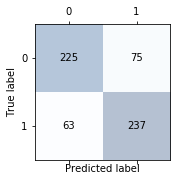

In [45]:
# Print sklearns performance metrics - precision, recall, f1score
print(classification_report(y_test, y_pred_nb))

# Sklearns confusion matrix
conf_matrix_NB = confusion_matrix(y_test, y_pred_nb)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix_NB, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_NB.shape[0]):
    for j in range(conf_matrix_NB.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix_NB[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

> ### Prediction Errors - Naive Bayes Model

In [46]:
# x = vectorizer.fit_transform(df["reviews"])
y_class1 = (df["score"] == 1).values.astype(np.int)

prob = nb.predict_proba(X)[:, 0]
predict = nb.predict(X)

bad_negative = np.argsort(prob[y_class1 == 0])[:5]
bad_positive = np.argsort(prob[y_class1 == 1])[-5:]

print("Mis-predicted Negative Reviews")
print('------------------------------')
for row in bad_negative:
    print(df["reviews"][y == 0].iloc[row])
    print("")

print("Mis-predicted Positive Reviews")
print('------------------------------')
for row in bad_positive:
    print(df["reviews"].iloc[row])
    print("")

Mis-predicted Negative Reviews
------------------------------
i purchas thi in the hope that i would be abl to record verbal messag to myself creativ thought and idea etc it doe an adequ job of that i had also hope i could use it as a simpl player to download affirm and such to listen to throughout the day thi it wont do and it wa not clear to me from the inform here and on the olympu site that it would not function thi way first even though it record wav file it doe not let you handl them well at all to transfer record to your comput you have to instal special softwar includ but you cannot transfer wav file back to the record accord to the softwar guid if you want a recorderplay to function easili like that you should go for the more expens one that allow you to use them as a usb flash drive like the creativ zen seri i did not instal the softwar as it offer noth other than the simpl transfer of a record to my comput i can record directli to the pc with much higher qualiti so whi bothe

> ### Task 4: Logistic Regression Classification

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, C=0.1)

# Train logistic regression using the training sets
logreg.fit(X_train, y_train)

# Predicting the test set results 
y_pred_lr = logreg.predict(X_test)

# Calculating the accuracies
print("Accuracy on training data: {} " .format(logreg.score(X_train, y_train)))
print("Accuracy on test data: {} " .format(logreg.score(X_test, y_test)))

Accuracy on training data: 0.9371428571428572 
Accuracy on test data: 0.785 


> ### Logistic Regression Performance Metrics

             precision    recall  f1-score   support

          0       0.79      0.78      0.78       300
          1       0.78      0.79      0.79       300

avg / total       0.79      0.79      0.78       600



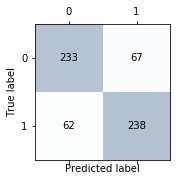

In [48]:
# Print sklearns performance metrics - precision, recall, f1score
print(classification_report(y_test, y_pred_lr))

# Sklearns confusion matrix
conf_matrix_LR = confusion_matrix(y_test, y_pred_lr)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix_LR, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_LR.shape[0]):
    for j in range(conf_matrix_LR.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix_LR[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

> ### Prediction Errors - Logistic Regression Model

In [49]:
y_class1 = (df["score"] == 1).values.astype(np.int)

prob_LR = logreg.predict_proba(X)[:, 0]
predict_LR = logreg.predict(X)

bad_negative_LR = np.argsort(prob_LR[y_class1 == 0])[:5]
bad_positive_LR = np.argsort(prob_LR[y_class1 == 1])[-5:]

print("Mis-predicted Negative Reviews")
print('------------------------------')
for row in bad_negative_LR:
    print(df["reviews"][y == 0].iloc[row])
    print("")

print("Mis-predicted Positive Reviews")
print('------------------------------')
for row in bad_positive_LR:
    print(df["reviews"].iloc[row])
    print("")

Mis-predicted Negative Reviews
------------------------------
when realtim traffic monitor came to my citi i immedi start look at solut to help my wife daili busi drive 2500 mile weekli crisscross a 50mile area through major traffic rout i quickli settl on an automot gp with realtim traffic monitor there are not yet mani choic in thi area so the option boil down to thi unit and the garmin 2720 these use fm radio for the traffic info the xmradio unit like the tomtom 700 and garmin 2730 had unaccept high monthli cost sinc i dont want xm radioi chose the cobra for it larg screen and posit review in area that were import to me it flaw rout abil wa not a major issu as it wa to be use in a wellknown region address lookup and traffic monitor were the primari needsin short i dont know much about how the cobra perform becaus i wa onli abl to use it for a few short test trip thi is becaus the mount hardwar is one of the most defici piec of engin i have ever encount in higherend electron gear the

> ### Results Analysis
Comparing Naive Bayes and Logistic Regression prediction on an unseen positive and negative review.

In [50]:
our_negative_review = vectorizer.transform(['I hated this product. It is \
not well designed at all, and it broke into pieces as soon as I got it. \
Would not recommend anything from this company.'])

our_positive_review = vectorizer.transform(["The movie was superb - I was \
on the edge of my seat the entire time. The acting was excellent, and the \
scenery - my goodness. Watch this movie now!"])

print("Naive Bayes prediction on a negative review", nb.predict_proba(our_negative_review)) 
print("Naive Bayes prediction on a positive review", nb.predict_proba(our_positive_review)) 

print("\nLogistic Regression prediction on a negative review", logreg.predict_proba(our_negative_review)) 
print("Logistic Regression prediction on a positive review", logreg.predict_proba(our_positive_review)) 

Naive Bayes prediction on a negative review [[0.65184015 0.34815985]]
Naive Bayes prediction on a positive review [[0.3843267 0.6156733]]

Logistic Regression prediction on a negative review [[0.41803002 0.58196998]]
Logistic Regression prediction on a positive review [[0.41475609 0.58524391]]


> The outputs above are formatted as [probability of negative, probability of positive]. NaiveBayes classifier got both of our reviews right, giving our negative sentence a 65% chance of being negative, and our positive sentence a 62% chance of being positive. Logistic Regression misclassified the negative review. With stemming, Logistic Regression and Naive Bayes improves and classified both test reviews correctly.

> ### Task 5: Interpretation
We can use a neat trick to identify the strongly predictive features (i.e. words).
> 1. Create a data set such that each row has exactly one feature. This is represented by the identity matrix.
> 2. Use the trained classifier to make predictions on this matrix.
 > 3. Sort the rows by predicted probabilities, and pick the top and bottom $K$ rows.

In [52]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[1])
probs = logreg.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

pos_words = words[ind[:10]]
neg_words = words[ind[-10:]]

pos_prob = probs[ind[:10]]
neg_prob = probs[ind[-10:]]

print("Positive words -->  P(Positive Review | word)")
for w, p in zip(pos_words, pos_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("\nNegative words -->  P(Positive Review | word)")
for w, p in zip(neg_words, neg_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Positive words -->  P(Positive Review | word)
               excel 0.70
               great 0.68
             perfect 0.68
                best 0.68
              highli 0.68
              memori 0.67
               price 0.66
                fast 0.66
             comfort 0.66
                easi 0.65

Negative words -->  P(Positive Review | word)
                 bad 0.44
                send 0.44
             terribl 0.44
                hope 0.43
          disappoint 0.43
                poor 0.42
                mayb 0.42
                 tri 0.41
                wast 0.40
              return 0.31


['excel' 'great' 'perfect' 'best' 'highli' 'memori' 'price' 'fast'
 'comfort' 'easi']

Top 10 Important Words for Positive Class:


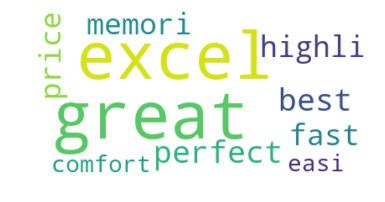

In [55]:
print(pos_words)

# Generate wordCloud
print("\nTop 10 Important Words for Positive Class:")
top10_pos_wc = WordCloud(background_color='white').generate('excel great perfect best highli memori price fast comfort easi')
plt.imshow(top10_pos_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

['bad' 'send' 'terribl' 'hope' 'disappoint' 'poor' 'mayb' 'tri' 'wast'
 'return']

Top 10 Important Words for Negative Class:


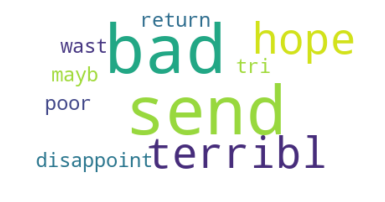

In [57]:
print(neg_words)

# Generate wordCloud
print("\nTop 10 Important Words for Negative Class:")
top10_neg_wc = WordCloud(background_color='white').generate('bad send terribl hope disappoint poor mayb tri wast return')
plt.imshow(top10_neg_wc, interpolation="bilinear")
plt.axis("off")
plt.show()